# MovieVerse

In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('/Users/nechamaborisute/Desktop/phase-2-project/zippedData/im.db')

In [4]:
pd.read_sql("""
SELECT name
FROM sqlite_master
WHERE type = "table"

""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,box_office_mojo
9,tn_movie_budgets


In [7]:
pd.read_sql("""
SELECT *
FROM tn_movie_budgets
LIMIT 5

""", conn)

,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [133]:
# basics_budgets = pd.read_sql("""

# SELECT *
# FROM movie_basics AS m
# JOIN tn_movie_budgets AS t
#         ON m.primary_title = t.movie
# GROUP BY genres

# """, conn)

In [134]:
# basics_budgets = basics_budgets.explode('genres')

In [135]:
# basics_budgets

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,index,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,tt0326592,The Overnight,The Overnight,2010,88.0,None,5620,21,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
1,tt10075374,The Little Prince,The Little Prince,2019,93.0,Action,618,19,"Feb 12, 2016",The Little Prince,"$77,500,000","$1,311,213","$102,028,919"
2,tt1460743,Reign of Assassins,Jian yu,2010,117.0,"Action,Adventure",3227,28,"Nov 1, 2016",Reign of Assassins,"$14,000,000",$0,"$11,354,230"
3,tt0448694,Puss in Boots,Puss in Boots,2011,90.0,"Action,Adventure,Animation",245,46,"Oct 28, 2011",Puss in Boots,"$130,000,000","$149,260,504","$554,987,477"
4,tt1390411,In the Heart of the Sea,In the Heart of the Sea,2015,122.0,"Action,Adventure,Biography",400,1,"Dec 11, 2015",In the Heart of the Sea,"$100,000,000","$25,020,758","$89,693,309"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,tt1836212,All Superheroes Must Die,All Superheroes Must Die,2011,78.0,"Sci-Fi,Thriller",5755,56,"Jan 4, 2013",All Superheroes Must Die,"$20,000",$0,$0
342,tt3779570,Won't Back Down,Won't Back Down,2014,114.0,Sport,2748,49,"Sep 28, 2012",Won't Back Down,"$19,000,000","$5,310,554","$5,745,503"
343,tt10109982,Miracle,Miracle,2019,NaN,Thriller,2044,45,"Feb 6, 2004",Miracle,"$28,000,000","$64,378,093","$64,474,705"
344,tt1891799,Exodus,Exodus,2011,151.0,War,4485,86,"Dec 15, 1960",Exodus,"$4,000,000","$21,750,000","$21,750,000"


In [127]:
pd.read_sql("""

SELECT m.genres,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
                t.production_budget
FROM movie_basics AS m
JOIN tn_movie_budgets AS t
        ON m.primary_title = t.movie
GROUP BY genres
ORDER BY average_worldwide_gross DESC
LIMIT 5

""", conn)

,genres,average_worldwide_gross,production_budget
0,"Fantasy,Romance",1.272470e+09,"$150,000,000"
1,"Adventure,Drama,Sport",1.272470e+09,"$150,000,000"
2,"Family,Fantasy,Musical",9.338154e+08,"$160,000,000"
3,"Adventure,Fantasy",7.012107e+08,"$250,000,000"
4,"Action,Adventure,Sci-Fi",5.991302e+08,"$215,000,000"


In [52]:
genre_profit = pd.read_sql("""

SELECT m.genres,
                COUNT(m.genres) AS genre_count,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
                AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_production_budget,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
FROM movie_basics AS m
JOIN tn_movie_budgets AS t
        ON m.primary_title = t.movie
GROUP BY genres
HAVING genre_count > 10
ORDER BY average_profit_perc DESC
LIMIT 25

""", conn)

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

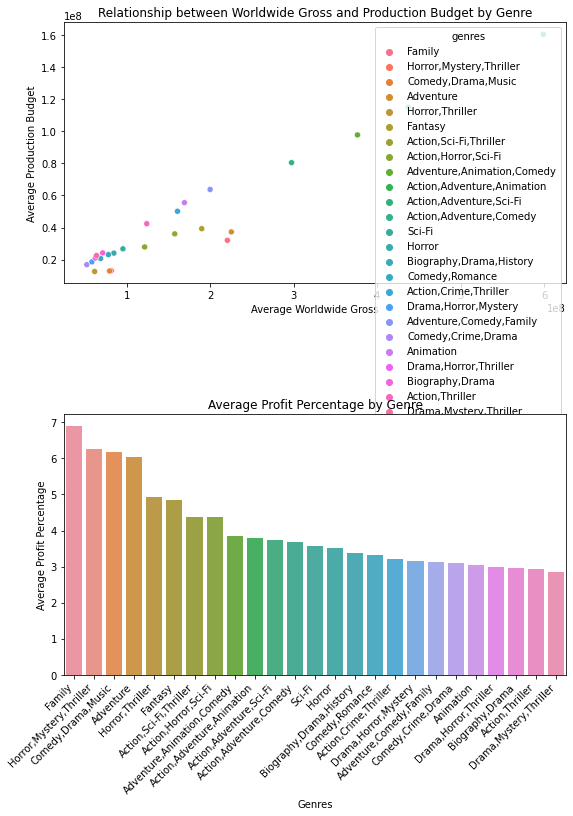

In [77]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

# Scatter plot
sns.scatterplot(x='average_worldwide_gross', y='average_production_budget', hue='genres', markers='genres', data=genre_profit, ax=ax1)
ax1.set_xlabel('Average Worldwide Gross')
ax1.set_ylabel('Average Production Budget')
ax1.set_title('Relationship between Worldwide Gross and Production Budget by Genre')

# Bar graph
sns.barplot(x='genres', y='average_profit_perc', data=genre_profit, ax=ax2)
ax2.set_xlabel('Genres')
ax2.set_ylabel('Average Profit Percentage')
ax2.set_title('Average Profit Percentage by Genre')

# Rotate the x-axis labels for better readability in the bar graph
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Show the plots
plt.show()

In [97]:
top_genres = pd.read_sql("""

SELECT 
    CASE 
        WHEN genres LIKE '%Action%' THEN 'Action'
        WHEN genres LIKE '%Adventure%' THEN 'Adventure'
        WHEN genres LIKE '%Horror%' THEN 'Horror'
        WHEN genres LIKE '%Family%' THEN 'Family'
        WHEN genres LIKE '%Comedy%' THEN 'Comedy'
        WHEN genres LIKE '%Animation%' THEN 'Animation'
        WHEN genres LIKE '%Thriller%' THEN 'Thriller'
        WHEN genres LIKE '%Sci-Fi%' THEN 'Sci-Fi'
        WHEN genres LIKE '%Fantasy%' THEN 'Fantasy'
        WHEN genres LIKE '%Drama%' THEN 'Drama'
        WHEN genres LIKE '%Mystery%' THEN 'Mystery'
        
        ELSE 'Other'
    END AS genres_sorted,
    SUM(CASE WHEN genres LIKE '%Action%' OR genres LIKE '%Adventure%' OR genres LIKE '%Horror%'  OR genres LIKE '%Family%'
                                     OR genres LIKE '%Comedy%' OR genres LIKE '%Animation%' OR genres LIKE '%Thriller%' OR genres LIKE '%Sci-Fi%' 
                                     OR genres LIKE '%Fantasy%' OR genres LIKE '%Drama%' OR genres LIKE '%Mystery%'
                                     THEN 1 ELSE 0 END) AS count,
     average_worldwide_gross,
     average_production_budget,
     average_profit_perc
FROM (SELECT m.genres,
                COUNT(m.genres) AS genre_count,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) AS average_worldwide_gross,
                AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_production_budget,
                AVG(CAST(REPLACE(REPLACE(t.worldwide_gross, '$', ''), ',', '') AS INT)) / AVG(CAST(REPLACE(REPLACE(t.production_budget, '$', ''), ',', '') AS INT)) AS average_profit_perc
FROM movie_basics AS m
JOIN tn_movie_budgets AS t
        ON m.primary_title = t.movie
GROUP BY genres

ORDER BY average_profit_perc DESC)
GROUP BY genres_sorted
ORDER BY average_profit_perc DESC;

""", conn)
top_genres

,genres_sorted,count,average_worldwide_gross,average_production_budget,average_profit_perc
0,Family,28,9.246274e+07,3244000.0,28.502695
1,Horror,34,9.512734e+07,3500000.0,27.179241
2,Thriller,23,3.516201e+08,18000000.0,19.534452
3,Fantasy,11,1.086101e+08,6530000.0,16.632484
4,Adventure,48,1.293142e+07,1000000.0,12.931420
5,Action,77,1.716858e+08,20000000.0,8.584290
6,Animation,7,4.182407e+07,5000000.0,8.364813
7,Other,0,8.115822e+07,10562500.0,7.683618
8,Comedy,40,2.938152e+08,40100000.0,7.327061
9,Drama,42,4.370000e+07,6000000.0,7.283333


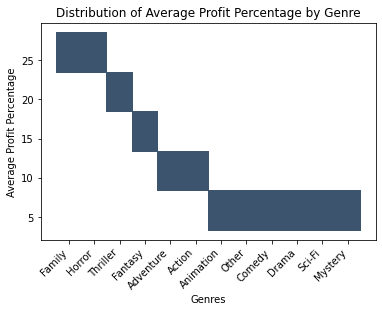

In [126]:
# Create the histogram
sns.histplot(data=top_genres, x = 'genres_sorted', y ='average_profit_perc')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Average Profit Percentage')
plt.title('Distribution of Average Profit Percentage by Genre')
plt.xticks(rotation=45, ha='right')
# Show the plot
plt.show()

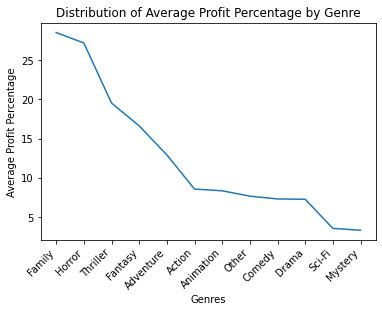

In [123]:
# Create the line graph
sns.lineplot(data=top_genres, x='genres_sorted', y='average_profit_perc')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Average Profit Percentage')
plt.title('Distribution of Average Profit Percentage by Genre')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

We found that the top genres based on average profit percentage are family, horror and thriller.